# Breast Cancer Detection
### Breast Cancer Detection Using Machine Learning

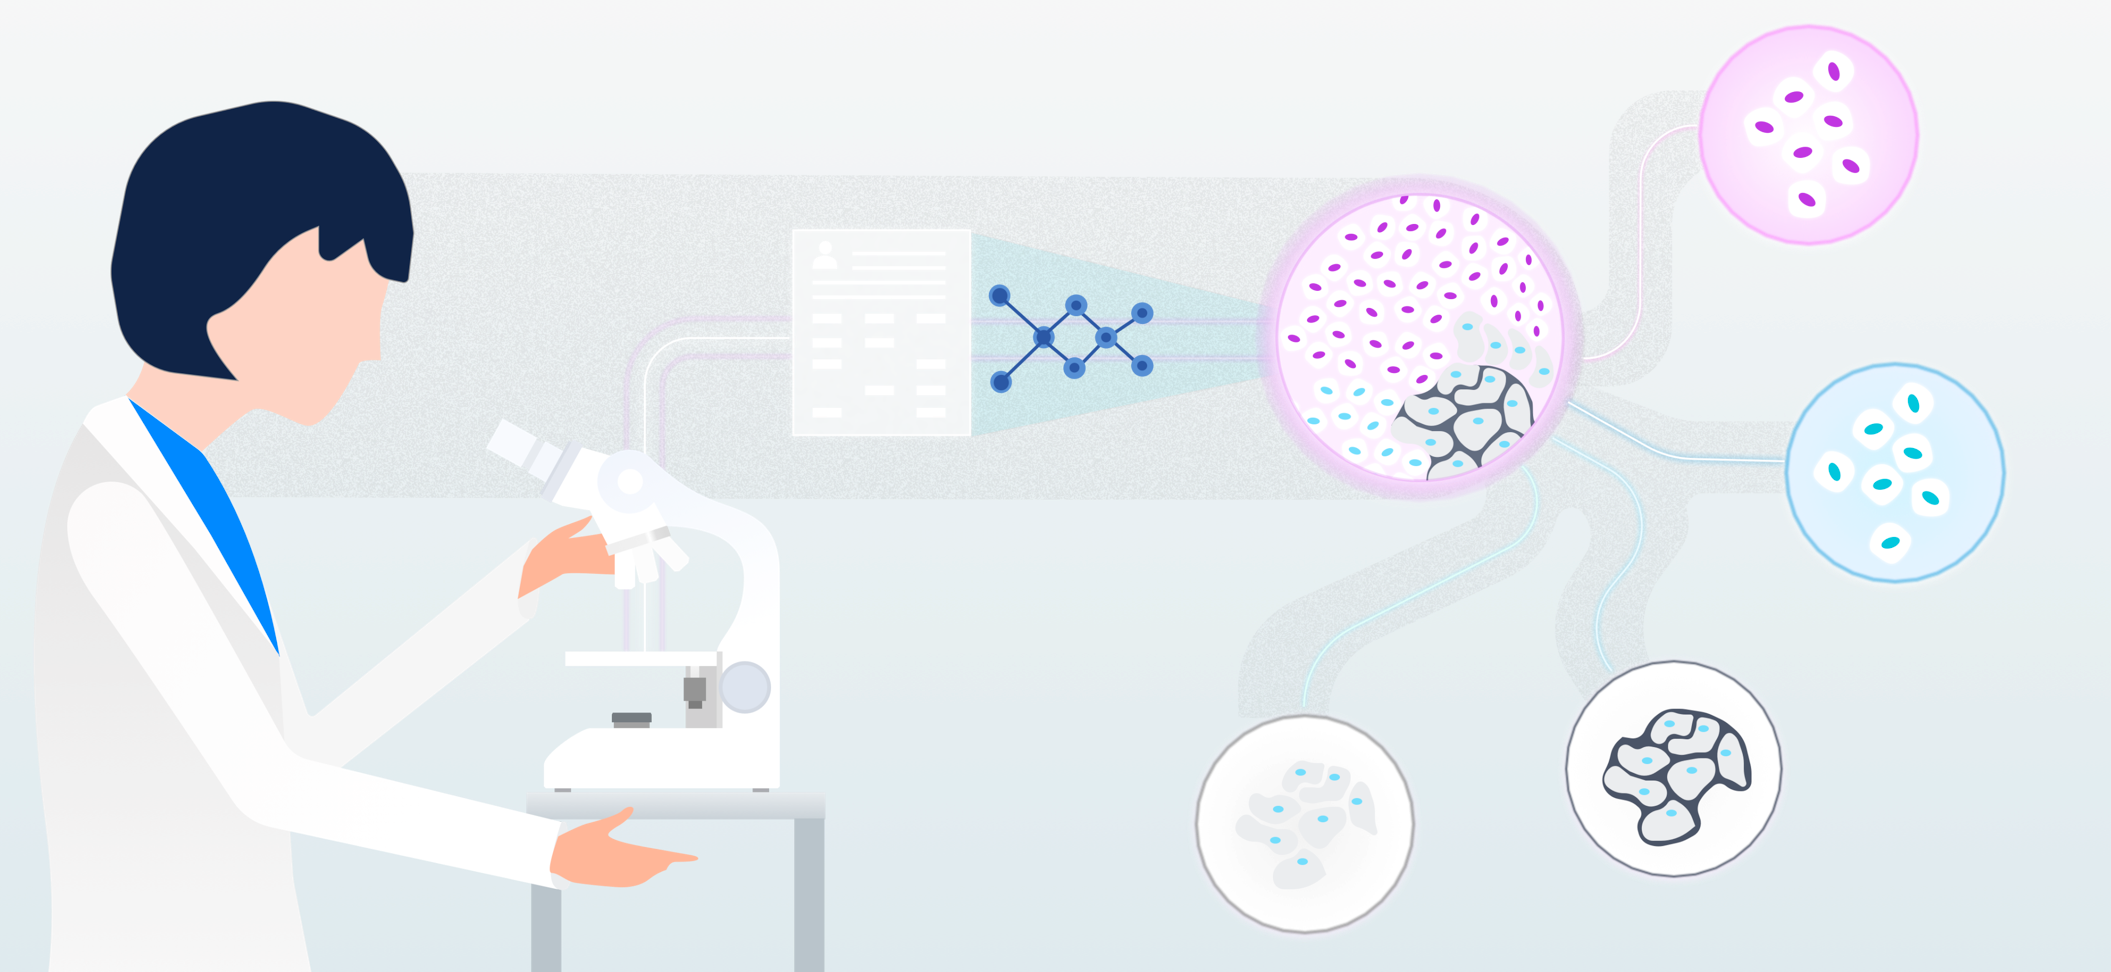

**What is Breast Cancer?**

Cancer occurs when changes called mutations take place in genes that regulate cell growth. The mutations let the cells divide and multiply in an uncontrolled, chaotic way. The cells keep on proliferating, producing copies that get progressively more abnormal. In most cases, the cell copies eventually end up forming a tumor.

Breast cancer occurs when a malignant (cancerous) tumor originates in the breast. As breast cancer tumors mature, they may metastasize (spread) to other parts of the body. The primary route of metastasis is the lymphatic system which, ironically enough, is also the body's primary system for producing and transporting white blood cells and other cancer-fighting immune system cells throughout the body. Metastasized cancer cells that aren't destroyed by the lymphatic system's white blood cells move through the lymphatic vessels and settle in remote body locations, forming new tumors and perpetuating the disease process.

Breast cancer is not just a woman's disease. It is quite possible for men to get breast cancer, although it occurs less frequently in men than in women. Our discussion will focus primarily on breast cancer as it relates to women but it should be noted that much of the information is also applicable for men.

In [1]:
#importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [2]:
cancerds = load_breast_cancer()

cancerds

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
cancerds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
cancerds.values()

dict_values([array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       

In [5]:
print(cancerds['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
cancerds.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
cancerds['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
cancerds.data.shape

(569, 30)

In [9]:
cancer = pd.DataFrame(cancerds.data,columns=cancerds.feature_names)

cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
cancer.to_csv('cancer.csv')

In [11]:
cancer['target']=pd.DataFrame(data = cancerds.target )

cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


<AxesSubplot:xlabel='target', ylabel='count'>

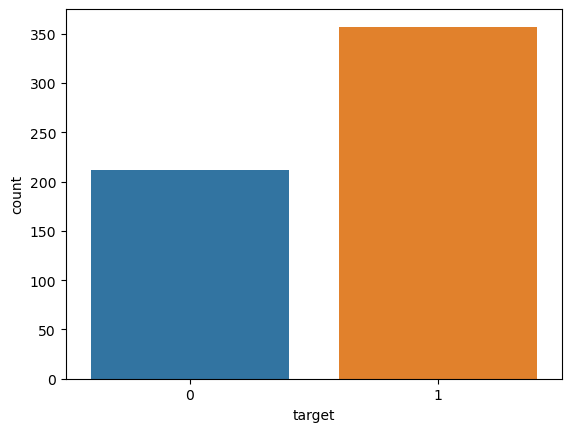

In [13]:
#sns.pairplot(cancer, hue='target')

sns.countplot(cancer['target'])

<AxesSubplot:>

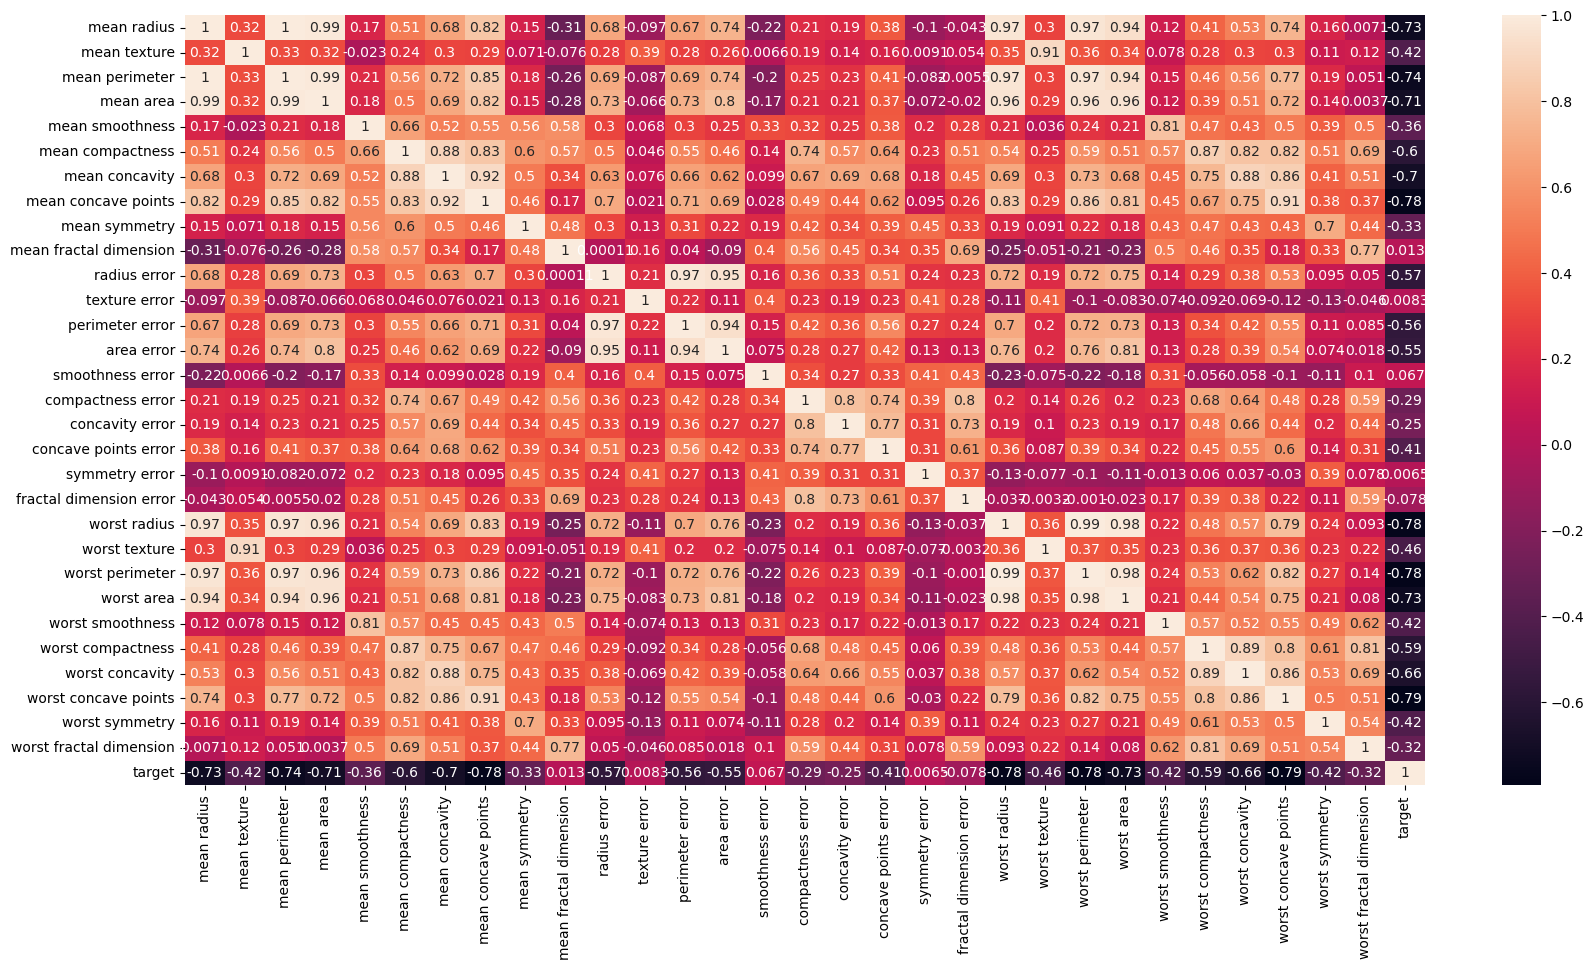

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(cancer.corr(), annot= True)

In [15]:
x=cancer.drop(['target'],axis=1)
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
y=cancer['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [17]:
x.shape

(569, 30)

In [18]:
y.shape

(569,)

In [19]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30, random_state=42)

In [20]:
train_x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [21]:
train_x.shape

(398, 30)

In [22]:
test_x.shape

(171, 30)

In [23]:
train_y

149    1
124    1
421    1
195    1
545    1
      ..
71     1
106    1
270    1
435    0
102    1
Name: target, Length: 398, dtype: int32

In [24]:
train_y.shape

(398,)

In [25]:
test_y.shape

(171,)

In [26]:
lg=LogisticRegression()

lg.fit(train_x,train_y)

LogisticRegression()

In [27]:
pred=lg.predict(test_x)

print(pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [28]:
print("Accuracy Score : ", accuracy_score(test_y,pred))

Accuracy Score :  0.9707602339181286


In [29]:
print('Confusion Matrix :\n', confusion_matrix(test_y,pred))

Confusion Matrix :
 [[ 59   4]
 [  1 107]]


In [30]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



<AxesSubplot:>

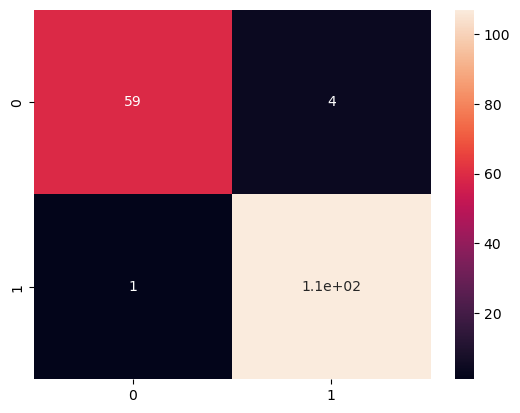

In [31]:
cm=confusion_matrix(test_y,pred)

sns.heatmap(cm, annot=  True)

In [32]:
def cancerpredict(p):
    p= p.reshape(1,-1)
    predict=lg.predict(p)
    print("Predicted value: ",predict)
    if predict==0:
        print("The person doesnot have cancer")
    else:
        print("The person is suffering from cancer")

In [33]:
p=np.array([20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678])

cancerpredict(p)

Predicted value:  [0]
The person doesnot have cancer


In [34]:
gnb = GaussianNB()
gnb.fit(train_x,train_y)

GaussianNB()

In [35]:
pr=gnb.predict(test_x)
pr

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [36]:
accuracy_score(test_y,pr)

0.9415204678362573

In [37]:
confusion_matrix(test_y,pr)

array([[ 57,   6],
       [  4, 104]], dtype=int64)

In [38]:
print(classification_report(test_y,pr))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



## Scaling Technique

### Standard scaling:


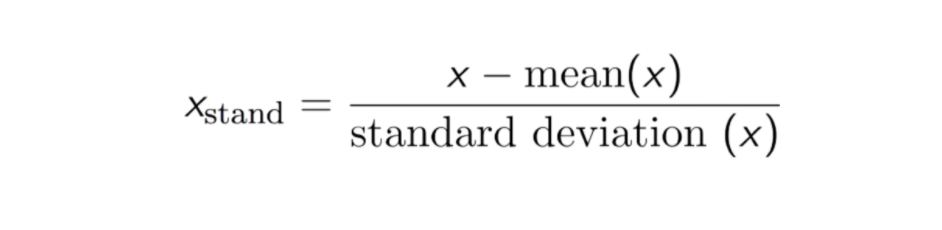

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
st =StandardScaler()
x =st.fit_transform(x)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [52]:
xf =pd.DataFrame(data=x)
print(xf)
xf.to_csv('cancerstandard.csv')

           0         1         2         3         4         5         6   \
0    1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1    1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2    1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3   -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4    1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   
..        ...       ...       ...       ...       ...       ...       ...   
564  2.110995  0.721473  2.060786  2.343856  1.041842  0.219060  1.947285   
565  1.704854  2.085134  1.615931  1.723842  0.102458 -0.017833  0.693043   
566  0.702284  2.045574  0.672676  0.577953 -0.840484 -0.038680  0.046588   
567  1.838341  2.336457  1.982524  1.735218  1.525767  3.272144  3.296944   
568 -1.808401  1.221792 -1.814389 -1.347789 -3.112085 -1.150752 -1.114873   

           7         8         9   ...        20        21        22  \
0  

In [53]:
x.mean()

-6.118909323768877e-16

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=45)

In [58]:
x_train

array([[-0.67234446,  0.5376343 , -0.71049114, ..., -1.17939473,
        -0.75672612, -1.01498598],
       [-0.73482758, -1.99421473, -0.75126944, ..., -1.02712875,
         0.79148992, -0.53231421],
       [-0.71778673,  1.2101567 , -0.73067434, ..., -1.01190215,
         0.55529395, -0.9141292 ],
       ...,
       [-0.50761623,  0.68191246, -0.49918541, ..., -0.49739543,
        -1.02365992,  0.38093846],
       [-0.07307451,  0.32819826, -0.09057863, ..., -0.70280223,
        -1.05439775,  0.05398513],
       [ 0.28478338,  2.44815641,  0.19528136, ..., -0.74391404,
         0.53749837, -1.23554094]])

In [60]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [61]:
predlg =lg.predict(x_test)
predlg

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0])

In [63]:
print("Accuracy Score : ", accuracy_score(y_test,predlg))
print('Confusion Matrix :\n', confusion_matrix(y_test,predlg))
print('classification_report',classification_report(y_test,predlg))

Accuracy Score :  0.9824561403508771
Confusion Matrix :
 [[40  2]
 [ 0 72]]
classification_report               precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<AxesSubplot:>

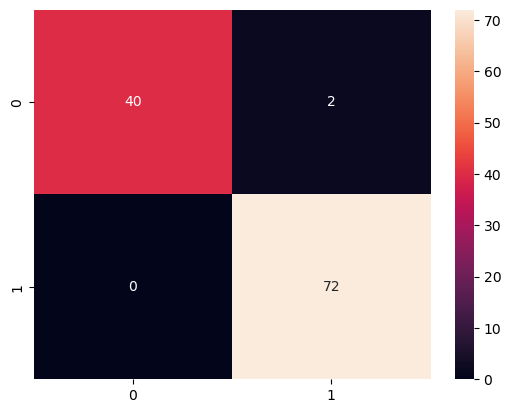

In [64]:
p = confusion_matrix(y_test,predlg)
sns.heatmap(p, annot = True)

In [68]:
p=np.array([1.0970639814699807,-2.0733350146975935,1.2699336881399383,0.9843749048031144,1.568466329243428,3.2835146709868264,2.652873983743168,2.532475216403245,2.2175150059646405,2.255746885296269,2.4897339267376193,-0.5652650590684639,2.833030865855184,2.4875775569611043,-0.21400164666895383,1.3168615683959484,0.72402615808036,0.6608199414286064,1.1487566671861758,0.9070830809973359,1.8866896251792757,-1.3592934737640827,2.3036006236225606,2.0012374893299207,1.3076862710715387,2.616665023512603,2.1095263465722556,2.296076127561788,2.750622244124955,1.9370146123781782])

cancerpredict(p)

Predicted value:  [0]
The person doesnot have cancer


### MinMax Scaler

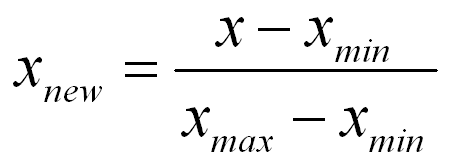

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
mm =MinMaxScaler()
x =mm.fit_transform(x)
x

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [72]:
sf = pd.DataFrame(data=x)
print(sf)

sf.to_csv('cancerMinMaxScaler.csv')

           0         1         2         3         4         5         6   \
0    0.521037  0.022658  0.545989  0.363733  0.593753  0.792037  0.703140   
1    0.643144  0.272574  0.615783  0.501591  0.289880  0.181768  0.203608   
2    0.601496  0.390260  0.595743  0.449417  0.514309  0.431017  0.462512   
3    0.210090  0.360839  0.233501  0.102906  0.811321  0.811361  0.565604   
4    0.629893  0.156578  0.630986  0.489290  0.430351  0.347893  0.463918   
..        ...       ...       ...       ...       ...       ...       ...   
564  0.690000  0.428813  0.678668  0.566490  0.526948  0.296055  0.571462   
565  0.622320  0.626987  0.604036  0.474019  0.407782  0.257714  0.337395   
566  0.455251  0.621238  0.445788  0.303118  0.288165  0.254340  0.216753   
567  0.644564  0.663510  0.665538  0.475716  0.588336  0.790197  0.823336   
568  0.036869  0.501522  0.028540  0.015907  0.000000  0.074351  0.000000   

           7         8         9   ...        20        21        22  \
0  

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=45)

In [73]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [74]:
print("Accuracy Score : ", accuracy_score(y_test,predlg))
print('Confusion Matrix :\n', confusion_matrix(y_test,predlg))
print('classification_report',classification_report(y_test,predlg))

Accuracy Score :  0.9824561403508771
Confusion Matrix :
 [[40  2]
 [ 0 72]]
classification_report               precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## AUC ROC Curve

Area under curve- Reciever operating Characteristics

In [39]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [40]:
y_pred_prob = lg.predict_proba(test_x)[:,1]

y_pred_prob

array([8.69529986e-01, 5.04554064e-09, 6.86305172e-03, 9.96588380e-01,
       9.98627880e-01, 5.75223032e-10, 9.57190881e-13, 4.47824115e-03,
       9.96088016e-01, 9.81253512e-01, 9.55521604e-01, 3.27623295e-04,
       9.86530221e-01, 4.72994301e-01, 9.95281498e-01, 1.01842693e-03,
       9.95830362e-01, 9.99689281e-01, 9.94174777e-01, 4.46843538e-07,
       8.42062708e-01, 9.64200738e-01, 1.11007375e-08, 9.93813806e-01,
       9.89120057e-01, 9.99168262e-01, 9.95911440e-01, 9.95651998e-01,
       9.92785309e-01, 1.31700651e-07, 9.96078344e-01, 9.97542809e-01,
       9.64869955e-01, 9.85595818e-01, 9.97924558e-01, 9.96258506e-01,
       2.55525146e-03, 9.79638503e-01, 5.15055005e-06, 9.14155190e-01,
       9.97706229e-01, 1.44524407e-03, 9.99111681e-01, 9.89793487e-01,
       9.97069597e-01, 9.54971655e-01, 9.98086248e-01, 9.83755717e-01,
       9.30502093e-01, 9.95365148e-01, 1.69893409e-04, 2.20014600e-09,
       9.61011040e-01, 9.96676601e-01, 9.98945934e-01, 9.82312331e-01,
      

In [41]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [42]:
fpr

array([0.        , 0.        , 0.        , 0.03174603, 0.03174603,
       0.04761905, 0.04761905, 0.06349206, 0.06349206, 0.11111111,
       0.11111111, 1.        ])

In [43]:
tpr

array([0.        , 0.00925926, 0.93518519, 0.93518519, 0.96296296,
       0.96296296, 0.98148148, 0.98148148, 0.99074074, 0.99074074,
       1.        , 1.        ])

In [44]:
thresholds

array([1.99992174e+00, 9.99921737e-01, 8.69529986e-01, 8.39625040e-01,
       7.95565906e-01, 7.76766858e-01, 6.92957132e-01, 6.50268361e-01,
       5.64035616e-01, 2.59259962e-01, 2.17885307e-01, 6.08763357e-26])

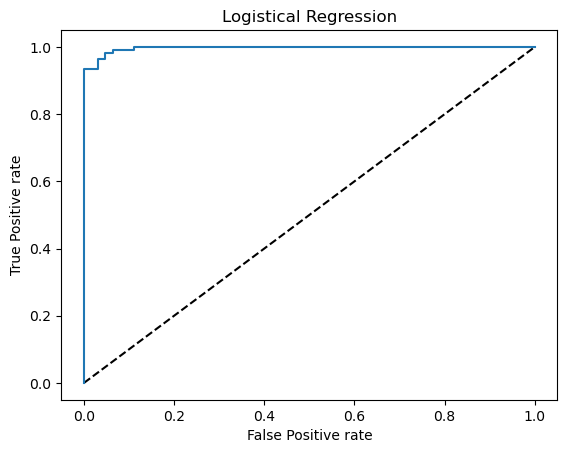

In [45]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistical Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Logistical Regression')
plt.show()

In [46]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))

print(auc_score)

0.9636243386243386


### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)
p = dt.predict(test_x)
ac = accuracy_score(test_y,p)
round(ac,3)

0.912

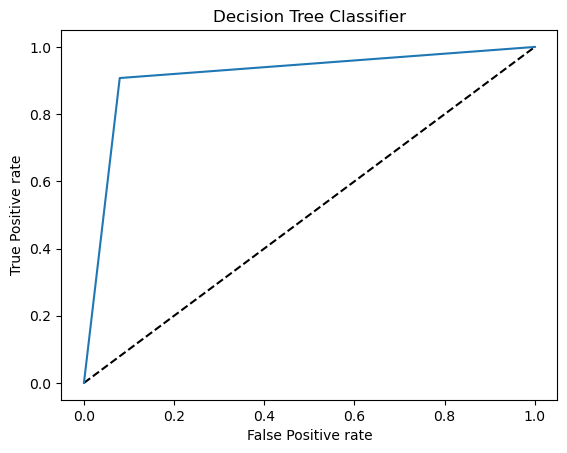

0.9140211640211641

In [48]:
y_pred_prob = dt.predict_proba(test_x)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistical Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score = roc_auc_score(test_y,dt.predict(test_x))
auc_score

### Testing various Models in one function

In [49]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()

model = [lg,gnb,svc,dtc,knn]

for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm = m.predict(test_x)
    print('Accuracy Score of ', m , 'is :')
    print(accuracy_score(test_y,predm))
    print(confusion_matrix(test_y,predm))
    print(classification_report(test_y,predm))
    print('\n')

Accuracy Score of  LogisticRegression() is :
0.9707602339181286
[[ 59   4]
 [  1 107]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



Accuracy Score of  GaussianNB() is :
0.9415204678362573
[[ 57   6]
 [  4 104]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



Accuracy Score of  SVC() is :
0.935672514619883
[[ 52  11]
 [  0 108]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.90       